In [44]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
import xrft as xrft
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter as gauss
# from scipy.integrate import trapezoid as trapz
from pyspec import spectrum as spec
from matplotlib.colors import LogNorm
import warnings
import scipy.integrate as integ
warnings.filterwarnings("ignore")
import seawater as sw

In [2]:
path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'surf*.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[1:])

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'surf*SASI_6h_his_20*_*.nc');listt.sort()
listt.append('/data/pacific/lrenault/SASI/CROCO/SMTH/surf_SASI_6h_his_2012-07.nc')
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt[1:])

In [3]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

In [4]:
import datetime

# t_ind=pd.DatetimeIndex(varf.time_counter.compute())
t_ind=varf.time_counter.groupby("time_counter.dayofyear").mean()
mon_ind=t_ind.dt.month
mes=np.array([12,1,2,3,4,5,6,7])
mes_str=['Dec/11','Jan/12','Feb/12','Mar/12','Apr/12','May/12','Jun/12','Jul/12']

In [ ]:
dxx=111*(np.diff(varf['nav_lat_rho'][:,0]).mean() +np.diff(varf['nav_lon_rho'][0,:]).mean())/2

In [5]:

tf=varf.temp.groupby("time_counter.dayofyear").mean()[:,300:-300,90:700].compute()

In [43]:
varf

<xarray.Dataset>
Dimensions:              (y_rho: 1520, x_rho: 1000, y_u: 1520, x_u: 999, y_v: 1519, x_v: 1000, time_counter: 852, y_w: 1520, x_w: 1000, axis_nbounds: 2)
Coordinates:
    nav_lat_rho          (y_rho, x_rho) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
    nav_lon_rho          (y_rho, x_rho) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
    nav_lat_u            (y_u, x_u) float32 dask.array<chunksize=(1520, 999), meta=np.ndarray>
    nav_lon_u            (y_u, x_u) float32 dask.array<chunksize=(1520, 999), meta=np.ndarray>
    nav_lat_v            (y_v, x_v) float32 dask.array<chunksize=(1519, 1000), meta=np.ndarray>
    nav_lon_v            (y_v, x_v) float32 dask.array<chunksize=(1519, 1000), meta=np.ndarray>
    nav_lat_w            (y_w, x_w) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
    nav_lon_w            (y_w, x_w) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
    time_instant         (time_counter) datetime64[ns] dask.array<chunksize=(124,), meta=np.ndarray>
  * time_counter         (time_counter) datetime64[ns] 2012-01-01T06:00:00 .....
Dimensions without coordinates: y_rho, x_rho, y_u, x_u, y_v, x_v, y_w, x_w, axis_nbounds
Data variables: (12/43)
    s_rho                (time_counter) float32 -0.00625 -0.00625 ... -0.00625
    s_w                  (time_counter) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(124, 2), meta=np.ndarray>
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(124, 2), meta=np.ndarray>
    hc                   (time_counter) float64 200.0 200.0 ... 200.0 200.0
    theta_s              (time_counter) float64 6.0 6.0 6.0 6.0 ... 6.0 6.0 6.0
    ...                   ...
    v                    (time_counter, y_v, x_v) float32 dask.array<chunksize=(124, 1519, 1000), meta=np.ndarray>
    w                    (time_counter, y_rho, x_rho) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
    omega                (time_counter, y_w, x_w) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
    temp                 (time_counter, y_rho, x_rho) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
    salt                 (time_counter, y_rho, x_rho) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
    rho                  (time_counter, y_rho, x_rho) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
Attributes: (12/49)
    name:                      Out/AVG_Y2012M01/SASI_6h_his
    description:               Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2020-Jul-30 22:12:58 GMT
    uuid:                      1e6e6c86-13c6-4527-ac3f-51b9c243770b
    title:                     SASI
    ...                        ...
    sponge_expl:               Sponge parameters : extent (m) & viscosity (m2...
    SRCS:                      main.F step.F read_inp.F timers_roms.F init_sc...
    CPP-options:               REGIONAL SASI DIAGNOSTICS_EDDY DIAGNOSTICS_TS ...
    history:                   Sun Apr 17 12:57:27 2022: ncwa -a s_rho tmp2.n...
    NCO:                       "4.6.0"
    nco_openmp_thread_number:  1

In [24]:
xtest=np.linspace(0,600,1000)
ytest=np.linspace(0,780,1000)

xtest,ytest=np.meshgrid(xtest,ytest)

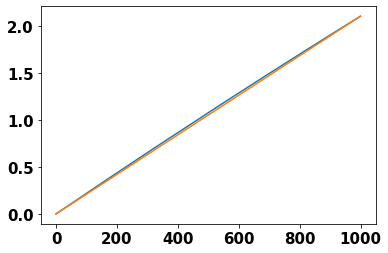

In [36]:
plt.plot(varf.nav_lat_rho.compute()[0,:]-varf.nav_lat_rho.compute()[0,0])
plt.plot(np.linspace(0,np.max(varf.nav_lat_rho.compute()[0,:]-varf.nav_lat_rho.compute()[0,0]),1000))

In [41]:
# for id in range(varf.nav_lat_rho.shape[1]):
#     print(np.rad2deg(np.arctan2(varf.nav_lat_rho[-1,id] - varf.nav_lat_rho[0,id],varf.nav_lon_rho[-1,id] - varf.nav_lon_rho[0,id]).compute()))

In [49]:
sw.dist?

Signature: sw.dist(lat, lon, units='km')
Docstring:
Calculate distance between two positions on globe using the "Plane
Sailing" method. Also uses simple geometry to calculate the bearing of
the path between position pairs.

Parameters
----------
lat : array_like
      decimal degrees (+ve N, -ve S) [- 90.. +90]
lon : array_like
      decimal degrees (+ve E, -ve W) [-180..+180]
units : string, optional
        default kilometers

Returns
-------
dist : array_like
       distance between positions in units
phaseangle : array_like
             angle of line between stations with x axis (East).
             Range of values are -180..+180. (E=0, N=90, S=-90)

Examples
--------
>>> import seawater as sw
>>> sw.dist(0, [-179, 180])
(array([ 111.12]), array([ 180.]))
>>> lon = [35, 35]
>>> lat = [41, 40]
>>> sw.dist(lat, lon)
(array([ 111.12]), array([-90.]))
>>> # Create a distance vector.
>>> lon = np.arange(30,40,1)
>>> lat = 35
>>> np.cumsum(np.append(0, sw.dist(lat, lon, units='km')[0]))


In [48]:
sw.dist(lon=varf.nav_lon_rho[:,-1].compute(),lat=varf.nav_lat_rho[:,-1].compute())

(array([0.50131524, 0.50131035, 0.49992633, ..., 0.5014735 , 0.50295055,
        0.50208306], dtype=float32),
 array([116.43475, 116.43363, 116.33266, ..., 118.97012, 118.87513,
        119.09552], dtype=float32))

In [47]:
sw.dist(lon=varf.nav_lon_rho[:,0].compute(),lat=varf.nav_lat_rho[:,0].compute())

(array([0.4988492 , 0.49814117, 0.50105333, ..., 0.50313133, 0.50132877,
        0.5031163 ], dtype=float32),
 array([119.526535, 119.382416, 119.381065, ..., 122.05305 , 122.18023 ,
        122.050316], dtype=float32))

In [46]:
sw.dist(lon=varf.nav_lon_rho[-1,:].compute(),lat=varf.nav_lat_rho[-1,:].compute())

(array([0.50174004, 0.5021791 , 0.5021671 , 0.5032796 , 0.50169206,
        0.5032555 , 0.5021192 , 0.5014309 , 0.5034449 , 0.5029822 ,
        0.50229716, 0.50273323, 0.50159615, 0.5029341 , 0.50179756,
        0.5029101 , 0.5031232 , 0.50153613, 0.50309914, 0.50196356,
        0.50195146, 0.50396305, 0.5017017 , 0.50236404, 0.50325257,
        0.5018912 , 0.503003  , 0.5014163 , 0.50365394, 0.5016179 ,
        0.5022798 , 0.50249255, 0.5024805 , 0.5022437 , 0.5024565 ,
        0.5026695 , 0.5024324 , 0.5024204 , 0.5033089 , 0.5023963 ,
        0.5019349 , 0.50237226, 0.50213546, 0.5032486 , 0.5021114 ,
        0.5025493 , 0.50298816, 0.5023002 , 0.5020633 , 0.5034004 ,
        0.5020392 , 0.5020272 , 0.5026918 , 0.5022281 , 0.50311565,
        0.5017544 , 0.5030915 , 0.50150603, 0.50329185, 0.5012578 ,
        0.50326777, 0.50325567, 0.5023473 , 0.5016583 , 0.5027709 ,
        0.50185895, 0.5027467 , 0.5029589 , 0.50272256, 0.50136167,
        0.5029227 , 0.50291055, 0.5020031 , 0.50

In [64]:
np.sqrt((sw.dist(lon=varf.nav_lon_rho[0,:].compute(),lat=varf.nav_lat_rho[0,:].compute())[0]-0.500)**2).max()*100

0.2636849880218506

In [57]:
print('{0:.2f}').format(np.sqrt((sw.dist(lon=varf.nav_lon_rho[0,:].compute(),lat=varf.nav_lat_rho[0,:].compute())[0]-0.500)**2)*100)

{0:.2f}


AttributeError: 'NoneType' object has no attribute 'format'

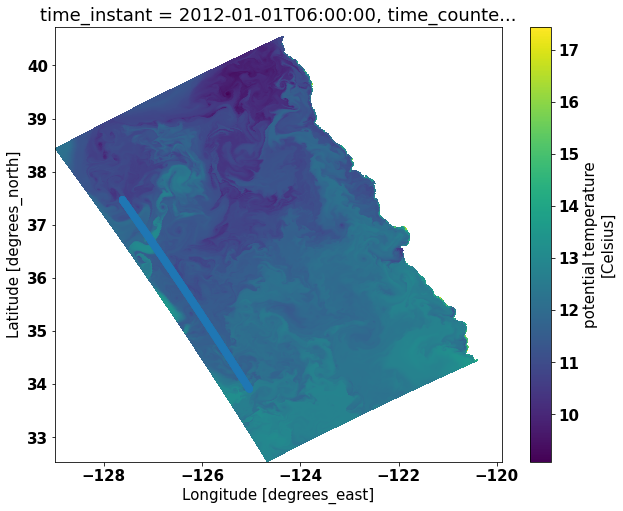

In [18]:
plt.figure(figsize=(10,8));
varf.temp[0].plot(x="nav_lon_rho",y="nav_lat_rho")


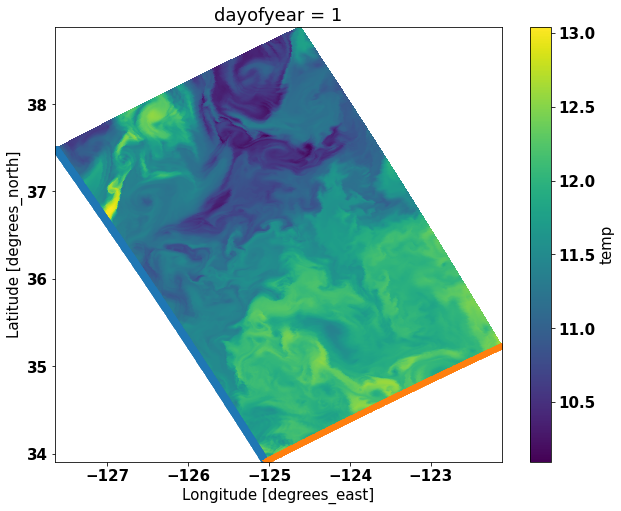

In [20]:
plt.figure(figsize=(10,8));
tf[0].plot(x="nav_lon_rho",y="nav_lat_rho")
plt.plot(tf.nav_lon_rho[:,0],tf.nav_lat_rho[:,0],'o')
plt.plot(tf.nav_lon_rho[0,:],tf.nav_lat_rho[0,:],'*')




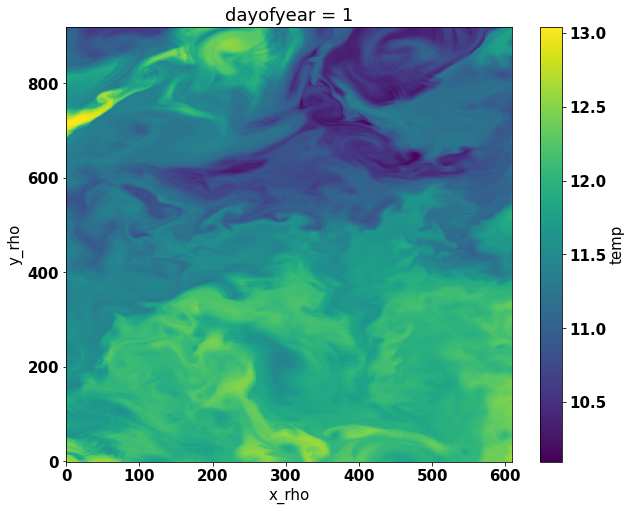

In [14]:
plt.figure(figsize=(10,8));
tf[0].plot()

